In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [36]:
# from https://www.youtube.com/watch?v=35gc3GE4Ddo&ab_channel=AdamPanagos
# linear interpolation uses a triangle convolutional kernel
# the covariance function is the autocorrelation of that, which is:
@np.vectorize
def g(x):
    if x < 1:
        return 1/3 * (x**3 - 3 * x + 2) + 1/6 * x * (x**2 - 6 * x + 6)
    elif x < 2:
        return -1/6 * (x - 2)**3
    else:
        return 0

In [40]:
xs_kernel = np.linspace(0, 4)
gs = g(xs_kernel)
gs_norm = gs/gs[0]

Text(0.5, 1.0, 'covariance function for linear interpolation?')

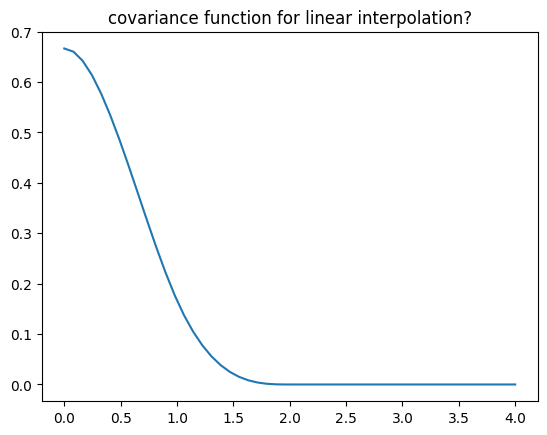

In [38]:
plt.plot(xs_kernel, gs)
plt.title("covariance function for linear interpolation?")

* Make a random white noise stream
* Linearly interpolate to new channels at 0.1, 0.2, ... fractional channels.
* Estimate covariance of each stream, including forwards and backwards
* See if this matches the kernel, or if the kernel formalism is bogus.

[On the Interpolation of Data with Normally Distributed Uncertainty for Visualization Steven Schlegel, Nico Korn, and Gerik Scheuermann, Member, IEEE](http://www.informatik.uni-leipzig.de/~schlegel/Paper/2012/Visweek2012/paper.pdf)
Useful paper on how interpolation kernels (linear, at least) can correlate points but reduce variance. Relations to Gaussian processes.


In [45]:
N = 4096
xs = np.arange(N)
ys = np.random.normal(size=N)

In [46]:
np.std(ys)

0.9919529129510862

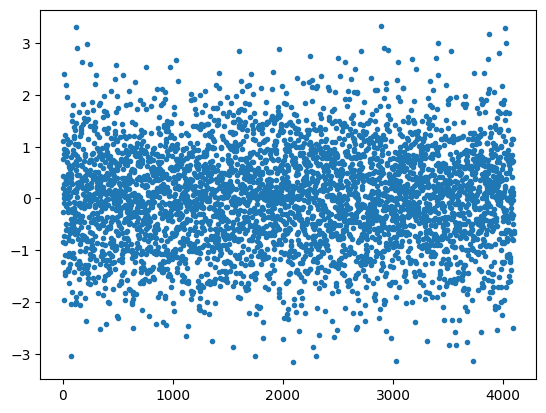

In [47]:
plt.plot(ys, ".")

In [48]:
def autocorrelation(x, norm=True):
    """
    Args:
        x : timeseries
        
    Returns:
        the normalized autocorrelation
    """
    ac = np.correlate(x, x, mode="full")
    if norm:
        ac /= np.max(ac)
    return ac[ac.size // 2:]

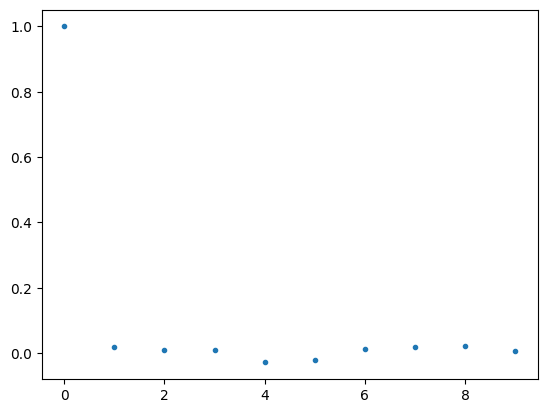

In [49]:
plt.plot(autocorrelation(ys)[:10], ".")

In [50]:
interp = interp1d(xs, ys, kind="linear", fill_value=0.0)

In [51]:
xs_half = xs[:-1] + 0.5

In [52]:
ys_half = interp(xs_half)

In [59]:
np.std(ys_half)

0.7075092984692054

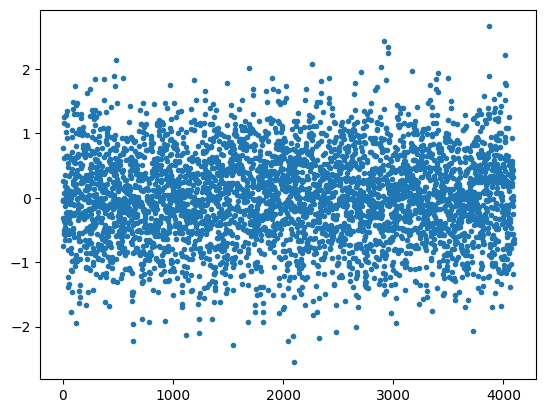

In [54]:
plt.plot(ys_half, ".")

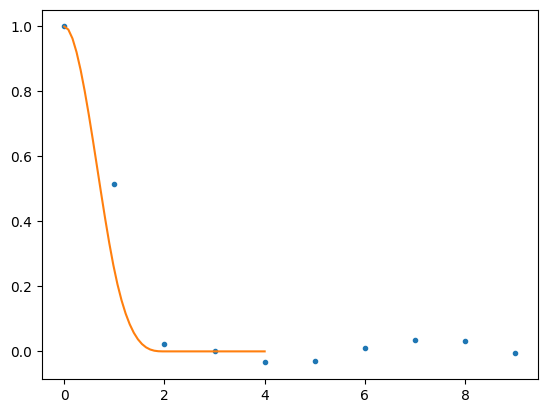

In [55]:
plt.plot(autocorrelation(ys_half)[:10], ".")
plt.plot(xs_kernel, gs_norm)

In [56]:
alphas = np.linspace(0, 1)

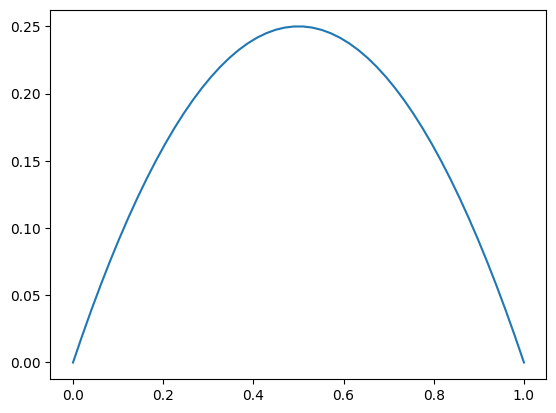

In [57]:
plt.plot(alphas, alphas - alphas**2)